In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy

In [22]:
nodes = list(range(5))

# directed graph
H = nx.DiGraph()

# undirected graph
# H = nx.Graph()

In [24]:
H.add_nodes_from(nodes)
H.add_edges_from([
    (1,0),
    (1,2),
    (1,3),
    (3,2),
    (3,4),
    (4,0)
])

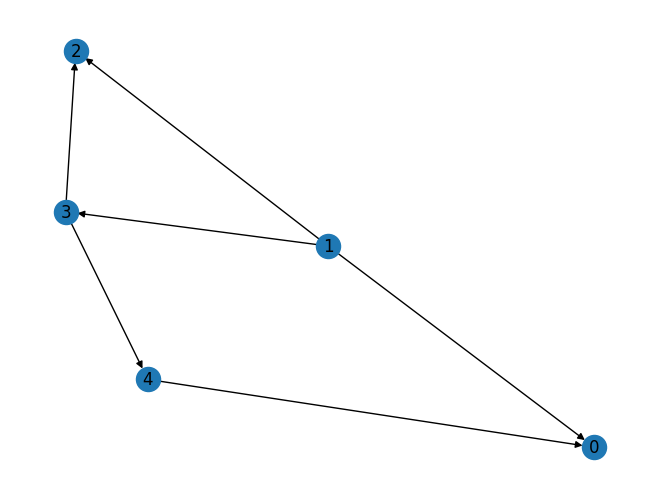

In [27]:
nx.draw(H, with_labels=True)

In [28]:
nx.adjacency_matrix(H).todense()

array([[0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0]])

In [29]:
degrees = dict(H.degree())

print("Individual degrees:")
for node, degree in degrees.items():
    print(f"Node {node}: Degree {degree}")

sum_of_degrees = sum(degrees)
print(f"\nSum of all degrees: {sum_of_degrees}")



Individual degrees:
Node 0: Degree 2
Node 1: Degree 3
Node 2: Degree 2
Node 3: Degree 3
Node 4: Degree 2

Sum of all degrees: 10


In [30]:
def verify_degree_distribution_sum(graph):
    degrees = dict(graph.degree()).values()
    n = graph.number_of_nodes()
    degree_counts = {}

    for d in degrees:
        degree_counts[d] = degree_counts.get(d, 0) + 1

    P = {k:v/n for k, v in degree_counts.items()}

    sum_P = sum(P.values())

    return abs(sum_P-1) < 1e-9


G1 = nx.erdos_renyi_graph(100, 0.1)
G2 = nx.barabasi_albert_graph(100, 2)
G3 = nx.watts_strogatz_graph(100, 4, 0.2)

print(verify_degree_distribution_sum(G1))
print(verify_degree_distribution_sum(G2))
print(verify_degree_distribution_sum(G3))

True
True
True


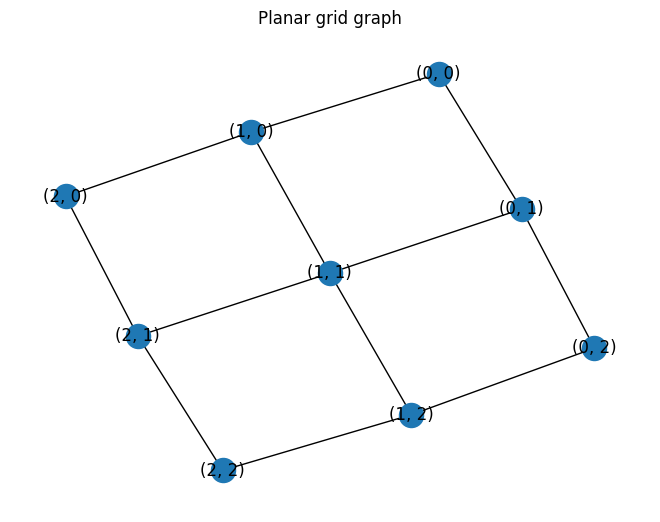

In [32]:
G1 = nx.grid_2d_graph(3, 3)
G2 = nx.cycle_graph(5)
G3 = nx.octahedral_graph()

nx.draw(G1, with_labels=True)
plt.title("Planar grid graph")
plt.show()

In [33]:
G4 = nx.complete_graph(5)
G5 = nx.complete_bipartite_graph(3, 3)

try:
    nx.draw_planer(G4)
except Exception as e:
    print("K5 is non planar - cannot be drawn without crossings")

K5 is non planar - cannot be drawn without crossings


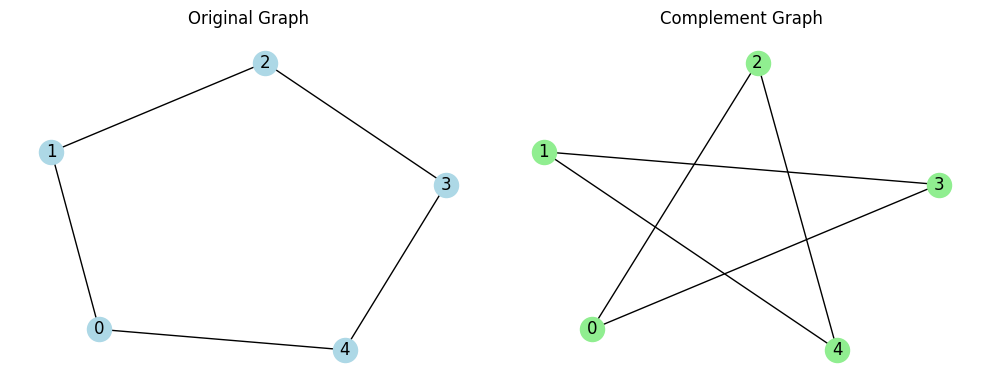

In [34]:
def draw_and_complement(G):
    plt.figure(figsize=(10,4))

    plt.subplot(121)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color = "lightblue")
    plt.title("Original Graph")

    plt.subplot(122)
    G_complement = nx.complement(G)
    nx.draw(G_complement, pos, with_labels=True, node_color="lightgreen")
    plt.title("Complement Graph")

    plt.tight_layout()
    plt.show()

G = nx.cycle_graph(5)
draw_and_complement(G)

In [35]:
D = nx.DiGraph()
D.add_edge('s','a', capacity=3)
D.add_edge('s','b', capacity=2)
D.add_edge('a','t', capacity=2)
D.add_edge('b','t', capacity=3)

flow_value, flow_dict = nx.maximum_flow(D, 's', 't')
cut_value, partition = nx.minimum_cut(D, 's', 't')

print(f"Max flow: {flow_value}")
print(f"Min cut capacity: {cut_value}")
print(f"Partition: {partition}")

Max flow: 4
Min cut capacity: 4
Partition: ({'a', 's'}, {'t', 'b'})


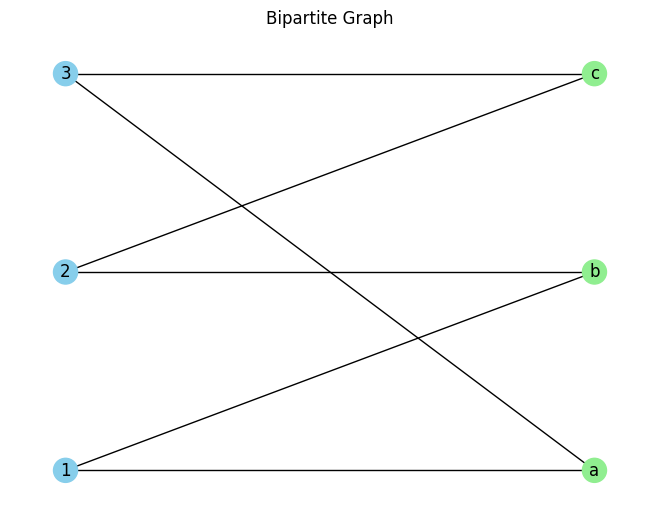

In [41]:
B = nx.Graph()
U_nodes = [1, 2, 3]
V_nodes = ['a', 'b', 'c']

B.add_nodes_from(U_nodes, bipartite=0)
B.add_nodes_from(V_nodes, bipartite=1)
B.add_edges_from([
    (1,'a'),
    (1,'b'),
    (2,'b'),
    (2,'c'),
    (3,'a'),
    (3,'c')
])


pos = nx.bipartite_layout(B, U_nodes)
nx.draw(B, pos, with_labels=True, node_color=['skyblue']*3 + ['lightgreen']*3)
plt.title("Bipartite Graph")
plt.show()